In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset
cereal_df = pd.read_csv('cereal.csv')

In [10]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
# check data types of each columns
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [12]:
#extract only necessary columns
fields = ['weight','shelf','cups']
cereal_df_subset = cereal_df.drop(fields, axis=1) # axis = 1 = by columns
cereal_df_subset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,51.592193


In [14]:
# find the correlation between pairs
cereal_corr = cereal_df_subset.corr(numeric_only=True) 
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,-0.240544
rating,-0.689376,0.470618,-0.409284,-0.401295,0.584160,0.052055,-0.759675,0.380165,-0.240544,1.000000


In [17]:
#ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr =np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [19]:
ones_corr.shape, cereal_corr.shape

((10, 10), (10, 10))

In [20]:
# np's triu: return only upper triangle matrix because another is duplicated
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

<Axes: >

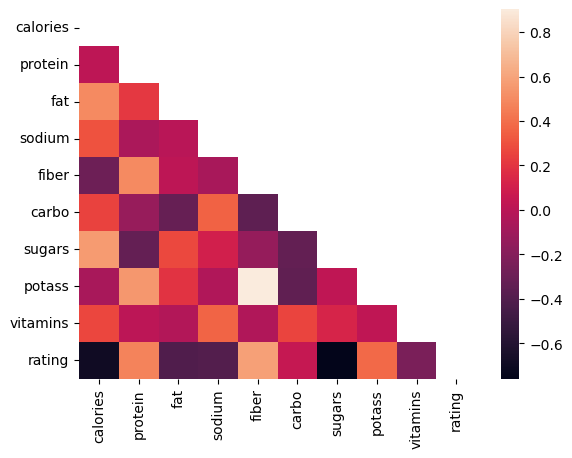

In [26]:
sns.heatmap(cereal_corr, mask=mask)

### When removing the upper tri-angle, here are still 2 empty cells in our matrix (calories & rating)

In [27]:
adjusted_mask = mask[1:, :-1]

In [28]:
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False, False]])

In [30]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

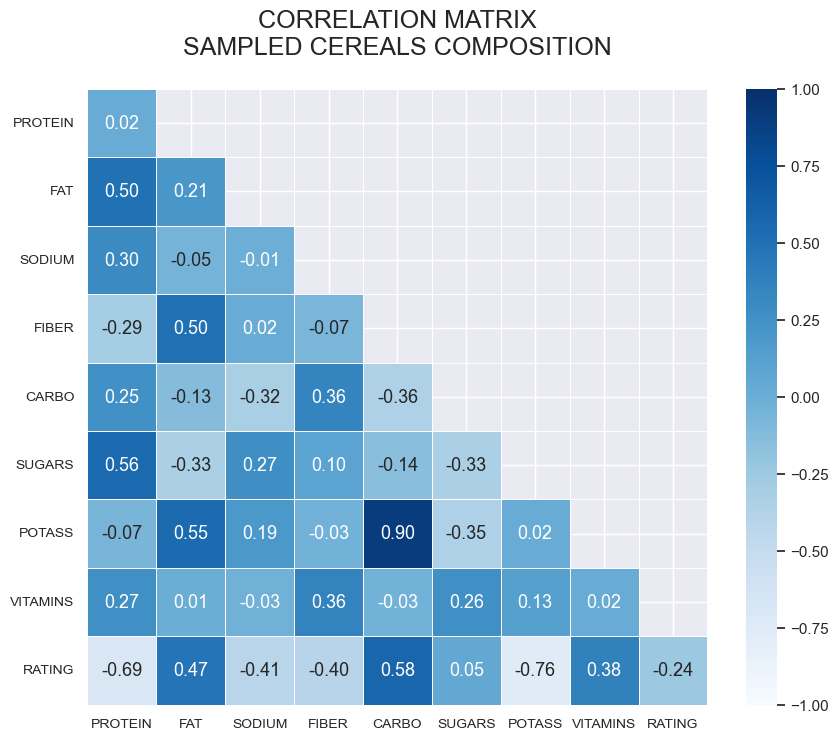

In [56]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(adjusted_cereal_corr, mask =adjusted_mask, xticklabels ='auto', annot = True, fmt='.2f', cmap ='Blues',
           vmin = -1, vmax = 1,annot_kws ={"fontsize":13}, linecolor = 'white', linewidth =0.5
           ); #fmt: limit decimals

yticks = [i.upper() for i in adjusted_cereal_corr.index];
xticks = [i.upper() for i in adjusted_cereal_corr.columns];

ax.set_yticklabels(yticks, rotation = 0, fontsize = 10);
ax.set_xticklabels(yticks,fontsize = 10);

title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='center', fontsize = 18);